# Final Dataset Report
#####    Arne Wittgen, Chris Vajdik

#### The following code block contains general code to set up the data for analysis and other operations in the report, but does not have any relevance beyond this purpose.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy

from controller import *
from utils import *
from analyses import *
from dataGetter import *
from preprocess import *

sns.set_style("whitegrid")

In [2]:
c = Controller(False, False, True, False, [], False, ([], [], [], []))
data = c.composeData()
a = Analyses(data, False)

print("%d songs with following attributes %s loaded." % (len(data), str(list(data.columns.values))))

86 songs with following attributes ['name', 'id', 'track_number', 'duration', 'key', 'mode', 'time_signature', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'speechiness', 'valence', 'tempo', 'explicit', 'complexity', 'popularity_abs', 'popularity_rel'] loaded.


### Abstract

[The abstract will be here in the final version]

### Introduction

[There will be more text for the introduction here in the final version, especially to introduce the general idea relevance of our report]

[added by Chris]
Our report is heavily based on usage of our self-built module for obtaining data and analysing it, therefore the code cells contain functions which may appear as 'black boxes'. To check or replicate these, the module can be found [here](https://github.com/ChrisScarred/ITM_song_popularity) along with explanations of its architecture and usage.

Our dataset analysis is conducted under the research question "Which relationship, if any, do the musical characteristics of a song have with its popularity?"
Therefore, our first main aim is to find out which musical characteristics affect the popularity of a specific artist’s song.  We will not consider lyrical characteristics.  Our second main aim is to which combination of characteristics should a new song from this particular artist have in order to be as popular amongst their listeners as possible. We will test our models both with absolute values of popularity and normalized values of popularity to see whether there is a difference. \
Our general hypothesis is that there exist at least two musical characteristics that correlate strongly with the song’s popularity and whose relation to the popularity is linear in nature. For every characteristic that we have obtained, we aim to answer whether or not it correlates with popularity and if so, how strong and of which type is this relation. \
This should give us a general overview of how important a characteristic is and allow us to propose a multiple regression model using forward- and backward-selection, including a check for possible collinearity or non-linear relationships.\
We chose the artist In This Moment since we both listen to them and therefore, we know that their music should be varied enough to create an interesting data set.  This was a concern because many artists produce tracks which are very similar to each other in their characteristics, and therefore in such cases we can predict that a popular song by the artist will be a song most similar to the songs they have already produced, ergo there would be little reasons to build a regression model.
We formulate our hypotheses as follows:
* H1.1: Models predicting normalized popularity perform significantly better than models predicting absolute popularity. Significantly better performance means 5% or more increase in accuracy which will be measured by MSE.
    * H1.0$_0$: Models predicting normalized popularity perform as well as models predicting absolute popularity.
    * H1.0$_A$: Models predicting normalized popularity perform significantly worse than models predicting absolute popularity.
* H2.1: There exists at least one model using any combination of the response variables to accurately predict the popularity of a song. In this case, accurately mean with MSE within 10% bounds of the mean test values.
* H2.0: There exists no model using any combination of the response variables to accurately predict the popularity of a song.
* H3: Every response variable has a statistically significant linearly characterized effect on the popularity score. Where statistically significant refers to the p-value being lower or equal to 0.05.
    * H3.1$_A$: Duration has a statistically significant linearly characterized effect on the popularity score.
    * H3.1$_0$: Duration does not have a statistically significant linearly characterized effect on the popularity score. 
    * H3.2$_A$: Explicitness has a statistically significant linearly characterized effect on the popularity score.
    * H3.2$_0$: Explicitness does not have a statistically significant linearly characterized effect on the popularity score.
    * H3.3$_A$: Key has a statistically significant linearly characterized effect on the popularity score.
    * H3.3$_0$: Key does not have a statistically significant linearly characterized effect on the popularity score.
    * H3.4$_A$: Mode has a statistically significant linearly characterized effect on the popularity score.
    * H3.4$_0$: Mode does not have a statistically significant linearly characterized effect on the popularity score.
    * H3.5$_A$: Time signature has a statistically significant linearly characterized effect on the popularity score.
    * H3.5$_0$: Time signature does not have a statistically significant linearly characterized effect on the popularity score.
    * H3.6$_A$: Valence has a statistically significant linearly characterized effect on the popularity score.
    * H3.6$_0$: Valence does not have a statistically significant linearly characterized effect on the popularity score.
    * H3.7$_A$: Tempo has a statistically significant linearly characterized effect on the popularity score.
    * H3.7$_0$: Tempo does not have a statistically significant linearly characterized effect on the popularity score.
    * H3.8$_A$: Acousticness has a statistically significant linearly characterized effect on the popularity score.
    * H3.8$_0$: Acousticness does not have a statistically significant linearly characterized effect on the popularity score. 
    * H3.9$_A$: Danceability has a statistically significant linearly characterized effect on the popularity score.
    * H3.9$_0$: Danceability does not have a statistically significant linearly characterized effect on the popularity score.
    * H3.10$_A$: Energy has a statistically significant linearly characterized effect on the popularity score.
    * H3.10$_0$: Energy does not have a statistically significant linearly characterized effect on the popularity score.
    * H3.11$_A$: Instrumentalness has a statistically significant linearly characterized effect on the popularity score.
    * H3.11$_0$: Instrumentalness does not have a statistically significant linearly characterized effect on the popularity score.
    * H3.12$_A$: Loudness has a statistically significant linearly characterized effect on the popularity score. 
    * H3.12$_0$: Loudness does not have a statistically significant linearly characterized effect on the popularity score.
    * H3.13$_A$: Speechiness has a statistically significant linearly characterized effect on the popularity score.
    * H3.13$_0$: Speechiness does not have a statistically significant linearly characterized effect on the popularity score.
    * H3.14$_A$: Complexity has a statistically significant linearly characterized effect on the popularity score.
    * H3.14$_0$: Complexity does not have a statistically significant linearly characterized effect on the popularity score.

### Data

We used the Spotify Developer API (https://developer.spotify.com/) to obtain information about songs by a single artist.  We decided to predict popular songs for one artist only because this allows to analyze the whole population without having to consider computational limitations, and reduces the amount of possibly relevant variables to a reasonable amount. For example, the general popularity of a song is greatly influenced by its genre and there are thousands of music genres, so obtaining enough samples would be a task for days if not weeks. \
We used the Spotipy library (https://spotipy.readthedocs.io/en/2.12.0/) to obtain the data we were interested in, using a custom Python3 script. These include all studio songs by the artist “In This Moment” along with their popularity as calculated by Spotify’s popularity algorithm, their name and Spotify id, track number, duration, whether or not are they explicit, musical attributes (key, mode, time signature, valence and tempo) and their ratings on acousticness, danceability, energy, instrumentalness, loudness and speechiness.  These are provided by Spotify as well.\
The specific characteristics of the explanatory variables are as follows:
* duration - a quantitative positive integer measure stating the duration of the song in miliseconds.
* explicitness - a categorical variable representing whether the song is explicit: 0 rep-resent it is not explicit, 1 represents it is.
* key - a categorical variable representing the overall key in the song. Integers map to pitches using standard Pitch Class notation:
    * C’s and notes that are equivalent to C (like B-sharp) are represented by 0.
    * C-sharp’s and notes that are equivalent to C-sharp (like D-flat) are represented by 1.
    * The other keys follow: D = 2, D-sharp = 3, E = 4, F = 5, F-sharp = 6, G = 7, G-sharp = 8, A = 9, B-flat (T) = 10 and B (E) = 11.
* mode - a categorical variable where 0 represents minor mode and 1 represents major mode.
* time signature - a quantitative integer measure ranging from 0 above, describing the estimated overall time signature of the song in the time signature format (meter) that specifies how many beats are in each bar.
* valence - a quantitative float measure ranging from 0.0 to 1.0, describing how musically positive a track feels (the higher the value, the more positive the feel).
* tempo - a quantitative float measure ranging from 0.0 above, typically having values between 50 and 200, describes how fast a song is in BPM (Beats Per Minute).
* acousticness - a quantitative float measure ranging from 0.0 to 1.0, describing the probability of the song being acoustic.
* danceability - a quantitative float measure ranging from 0.0 to 1.0, describing how suitable the song is for dancing (the higher the value, the more suitable the song is for dancing). The measurement is based on musical elements including tempo, rhythm stability, beat strength and overall regularity.
* energy - a quantitative float measure ranging from 0.0 to 1.0, describing how energetic the song feels (the higher the value, the more energetic the song). The measurement is based on dynamic range, perceived loudness, timbre, onset rate and general entropy.
* instrumentalness - a quantitative float measure ranging from 0.0 to 1.0, describing the relative number of instrumental characteristics in the song, with values above 0.5 likely being instrumental songs. The measurement is based on the presence of words, with song containing only vocals like “Aaaah” or “Oooh” considered instrumental.
* loudness - a quantitative float measure typically ranging from -60 to 0, describing the average loudness of the song in dB (decibel).
* speechiness - a quantitative float measure ranging from 0.0 to 1.0, describing how much of a spoken word is probably there in the song with values above 0.66 indicating the track is most likely a podcast or an interview.
* complexity - a quantitative positive integer measure ranging from 0 above, describing how complex the song is (the higher the number, the more complex the song). This value corresponds to the number of segments, or in other words, continuous similar parts of the song, in the song. This value will be normalized to range from 0.0 to 1.0 before building the models.

It should be noted that this information is provided by the official Spotify API documentation.

aNext, a univariate analysis of the data will be conducted to get a rough overview of the dataset.

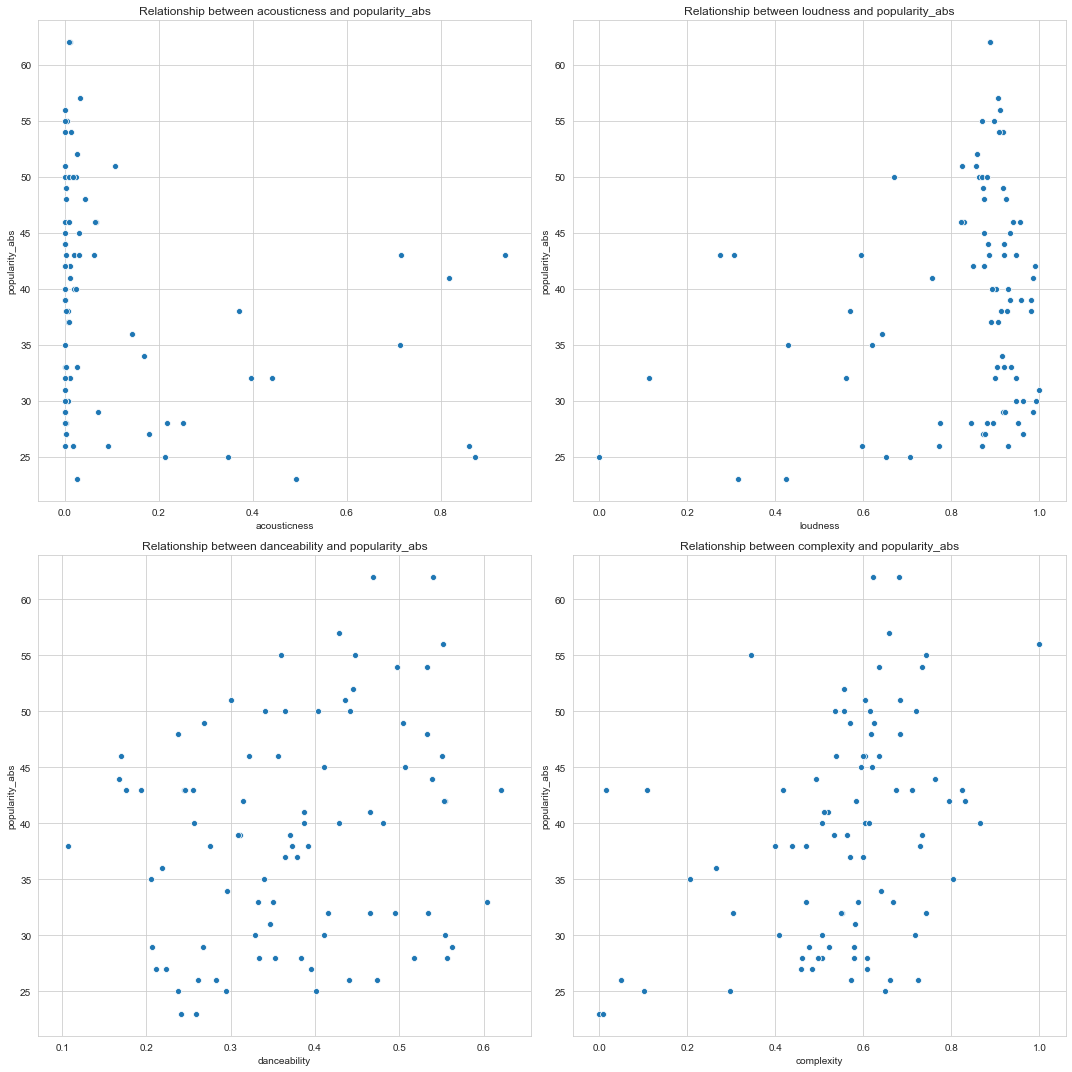

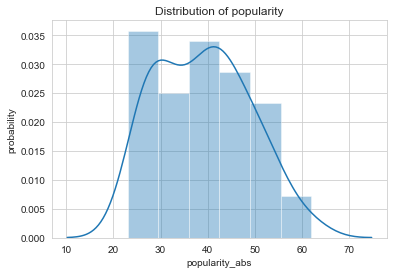

In [3]:
make_func_plots(['acousticness', 'loudness', 'danceability', 'complexity'], ['popularity_abs'], 2, print_scplot, data)

plt.figure()
sns.distplot(data['popularity_abs']).set(title = 'Distribution of popularity', ylabel = 'probability')
plt.show()

It should be noted that all variables were analyzed, but only the graphs displaying relevant insights are shown above.\
There are multiple interesting observations here:
* while a majority of songs build a cloud at an acousticness of zero, due to having an acousticness of zero or near zero, about 20% of the population build a very loose cloud ranging up to near 1 for acousticness, which seems to have a moderate positive linear relationship.
* for loudness, a similar behaviour can be observed: The majority of songs builds a cloud at a loudness of near 1 which has a high spread in popularity, the leftover songs with a lower loudness seem to have a weak positive linear relationship.
* the variable danceability seems to have a weak to moderate positive linear relationship with popularity. While the spread of data is very high, it is notable that there are no prominent outliers, and the trend seems to be consistent throughout the data.
* For complexity, most of the entries are centered around the value of 0.6. The relationship to popularity here seems to be, again weak to moderate, positive and either linear or a second order polynomial.
* the popularity is roughly normally distributed. The histogram has a slight right-skew, which shouldn't be too concerning since it's reasonable for a band to have a few songs that become very popular (e.g. through features with more popular artists) and therefore introduce skew to the data.

### Results

When perform either backward- or forward-selection on this dataset, both approaches end up with the same model, namely one where the only statistically signifcant variable is complexity:

In [4]:
model_abs_str = "popularity_abs ~ complexity"
model_rel_str = "popularity_rel ~ complexity"

model_abs = sm.formula.ols(formula=model_abs_str, data=data)
model_rel = sm.formula.ols(formula=model_rel_str, data=data)

model_abs_fitted = model_abs.fit()
model_rel_fitted = model_rel.fit()

print(model_abs_fitted.summary())
print(model_rel_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:         popularity_abs   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     13.77
Date:                Wed, 10 Jun 2020   Prob (F-statistic):           0.000370
Time:                        22:01:09   Log-Likelihood:                -311.43
No. Observations:                  86   AIC:                             626.9
Df Residuals:                      84   BIC:                             631.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.4113      3.022      9.400      0.0

Taking a closer look at the model summary shows the following:
* while there are no other statistically significant variables, complexity has a high statistical significance at $p = 0.001$.\
[there should definitely be more about the model itself here]

While this seems to be the definitive linear model when applying backwards or forward selection, there are interesting observations to be made when creating a linear model for each explanatory variable separately:

In [5]:
targets, variables = a.getTargVars()
print_p_vals(targets, variables, data)

----------
p-value of track_number: 0.2508
p-value of duration: 0.0054
p-value of key: 0.2666
p-value of mode: 0.9399
p-value of time_signature: 0.7222
p-value of acousticness: 0.0220
p-value of danceability: 0.0465
p-value of energy: 0.1254
p-value of instrumentalness: 0.0946
p-value of loudness: 0.0331
p-value of speechiness: 0.2864
p-value of valence: 0.0756
p-value of tempo: 0.7446
p-value of explicit: 0.0747
p-value of complexity: 0.0004
----------
p-value of track_number: 0.2508
p-value of duration: 0.0054
p-value of key: 0.2666
p-value of mode: 0.9399
p-value of time_signature: 0.7222
p-value of acousticness: 0.0220
p-value of danceability: 0.0465
p-value of energy: 0.1254
p-value of instrumentalness: 0.0946
p-value of loudness: 0.0331
p-value of speechiness: 0.2864
p-value of valence: 0.0756
p-value of tempo: 0.7446
p-value of explicit: 0.0747
p-value of complexity: 0.0004


Looking at the p-values here, we can conclude that on their own, also acousticness and loudness have a statistically significant linear relationship with the popularity of a song, when using a significance level of $a = 0.05$. Were the significance level to be increased to 0.10, danceability, valence and explicitness could also be considered statistically significant. Now, when adding any of these variables to a multiple regression model together with complexity, the p-values far exeed the significance level, as shown at the example of a model with the explanatory variables complexity, acousticness and loudness:

In [6]:
model_cal_str = "popularity_abs ~ complexity + acousticness + loudness"
model_cal = sm.formula.ols(formula=model_cal_str, data=data)
model_cal_fitted = model_cal.fit()
print(model_cal_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:         popularity_abs   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     5.386
Date:                Wed, 10 Jun 2020   Prob (F-statistic):            0.00196
Time:                        22:01:09   Log-Likelihood:                -310.22
No. Observations:                  86   AIC:                             628.4
Df Residuals:                      82   BIC:                             638.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       33.3723      5.607      5.951   

As it can be seen, both acousticness and loudness exceed even a significance level of 0.10, at $p = 0.143$ and $p = 485$ respectively. Therefore, the statistical significance of acousticness and loudness does not keep up in a multivariate model.

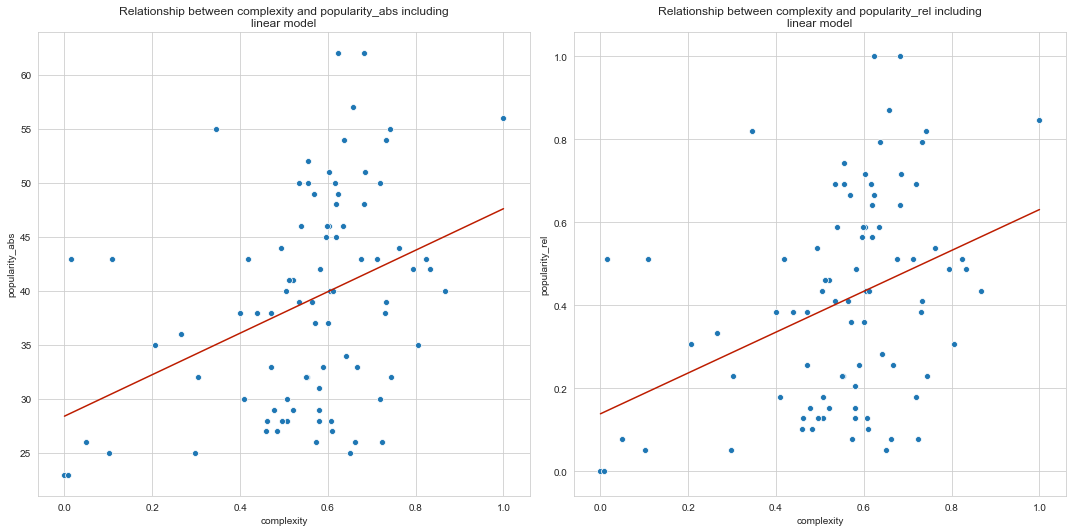

In [7]:
abs_pred = model_abs_fitted.predict(data)
rel_pred = model_rel_fitted.predict(data)

make_func_plots(["complexity"], ["popularity_abs", "popularity_rel"], 2, print_scpplot, data, prediction=[abs_pred, rel_pred])

Analyzing the plot of the previously presented linear model containing just complexity as explanatory variable, it can be seen that there are quite a few influential outliers with high leverage. While the main cloud centered around a complexity of 0.6 suggests a steep slope, the linear model shows a much more gradual incline.
[I am very unsure if this is good/correct reasoning]

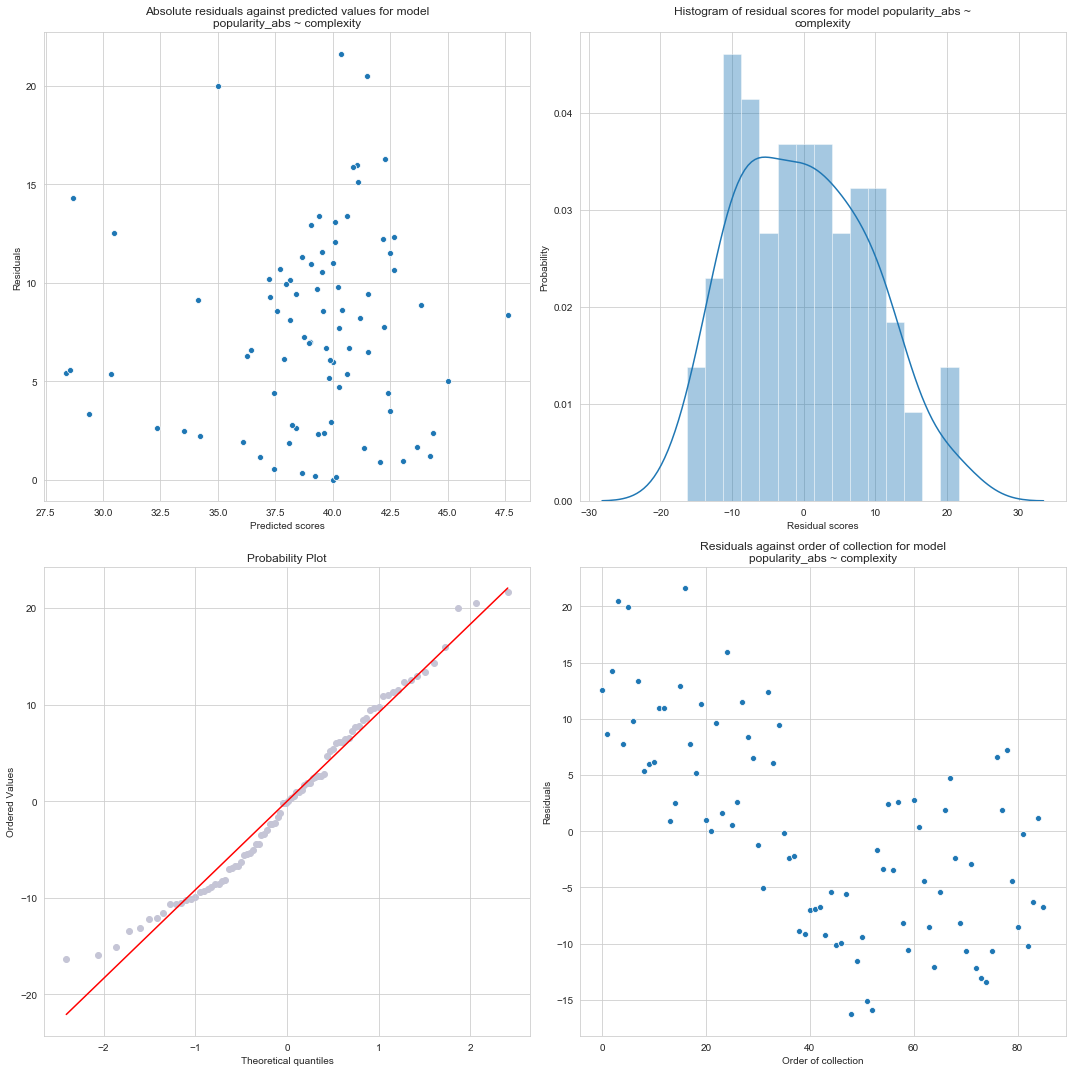

In [8]:
print_stat_plots(model_abs_str, data)

## Results obtained by running forward and backward selection on r^2 and MAPE as criteria for best model selection

### Best forward selection model using MAPE as the selection criterion

                            OLS Regression Results                            
Dep. Variable:         popularity_abs   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     7.071
Date:                Wed, 10 Jun 2020   Prob (F-statistic):            0.00146
Time:                        22:01:11   Log-Likelihood:                -311.19
No. Observations:                  86   AIC:                             628.4
Df Residuals:                      83   BIC:                             635.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.2835      4.359      6.029      0.0

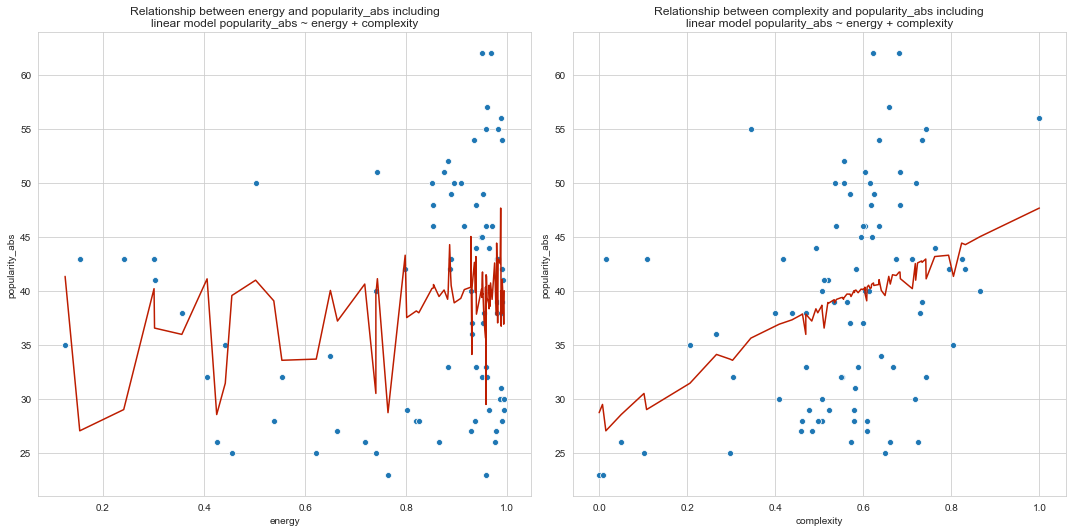

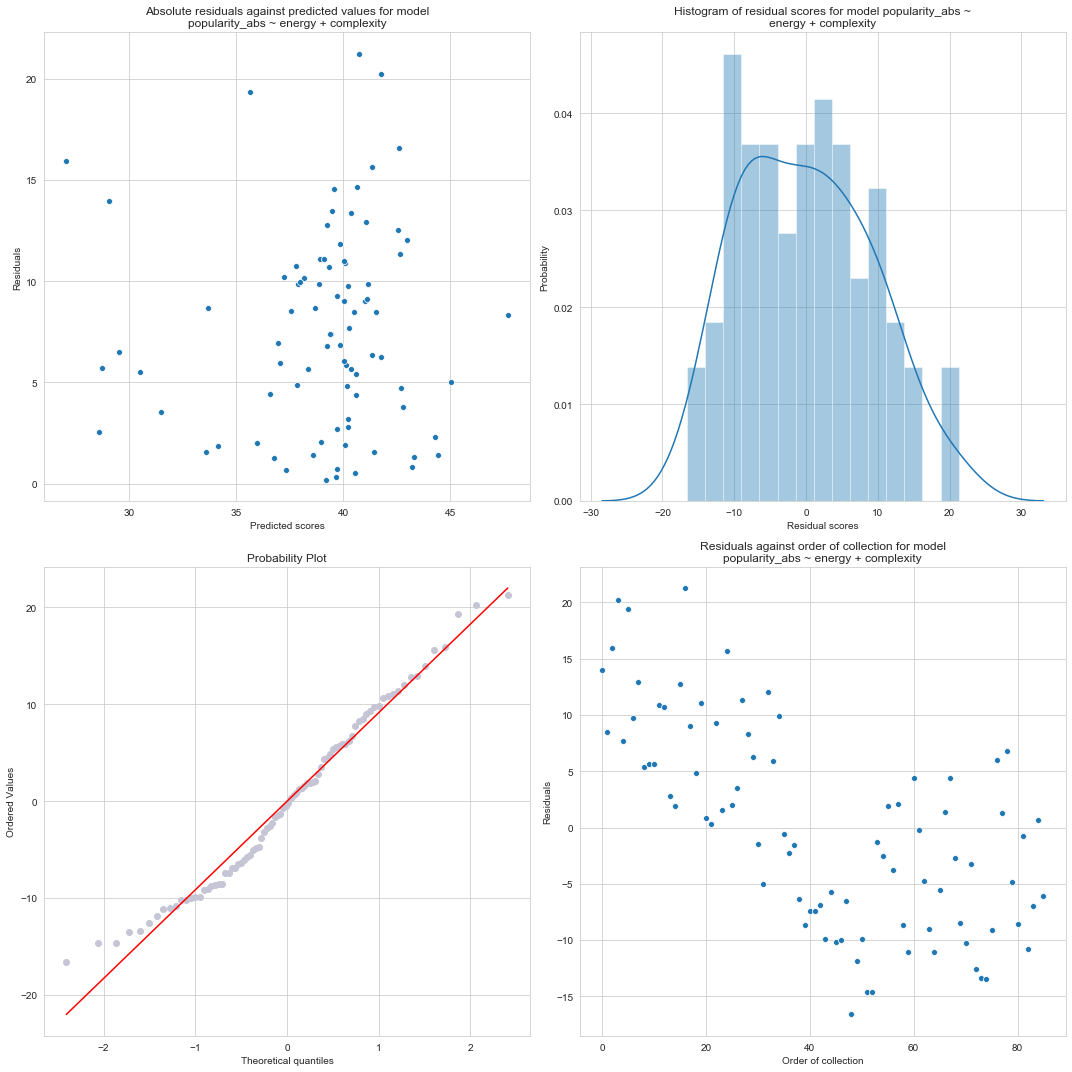

In [9]:
print_all_model_stats("popularity_abs ~ energy + complexity", data)

### Best forward selection model using r^2 as the selection criterion

                            OLS Regression Results                            
Dep. Variable:         popularity_rel   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     5.325
Date:                Wed, 10 Jun 2020   Prob (F-statistic):           0.000283
Time:                        22:01:13   Log-Likelihood:                 9.4650
No. Observations:                  86   AIC:                            -6.930
Df Residuals:                      80   BIC:                             7.796
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.2299      0.086      2.684   

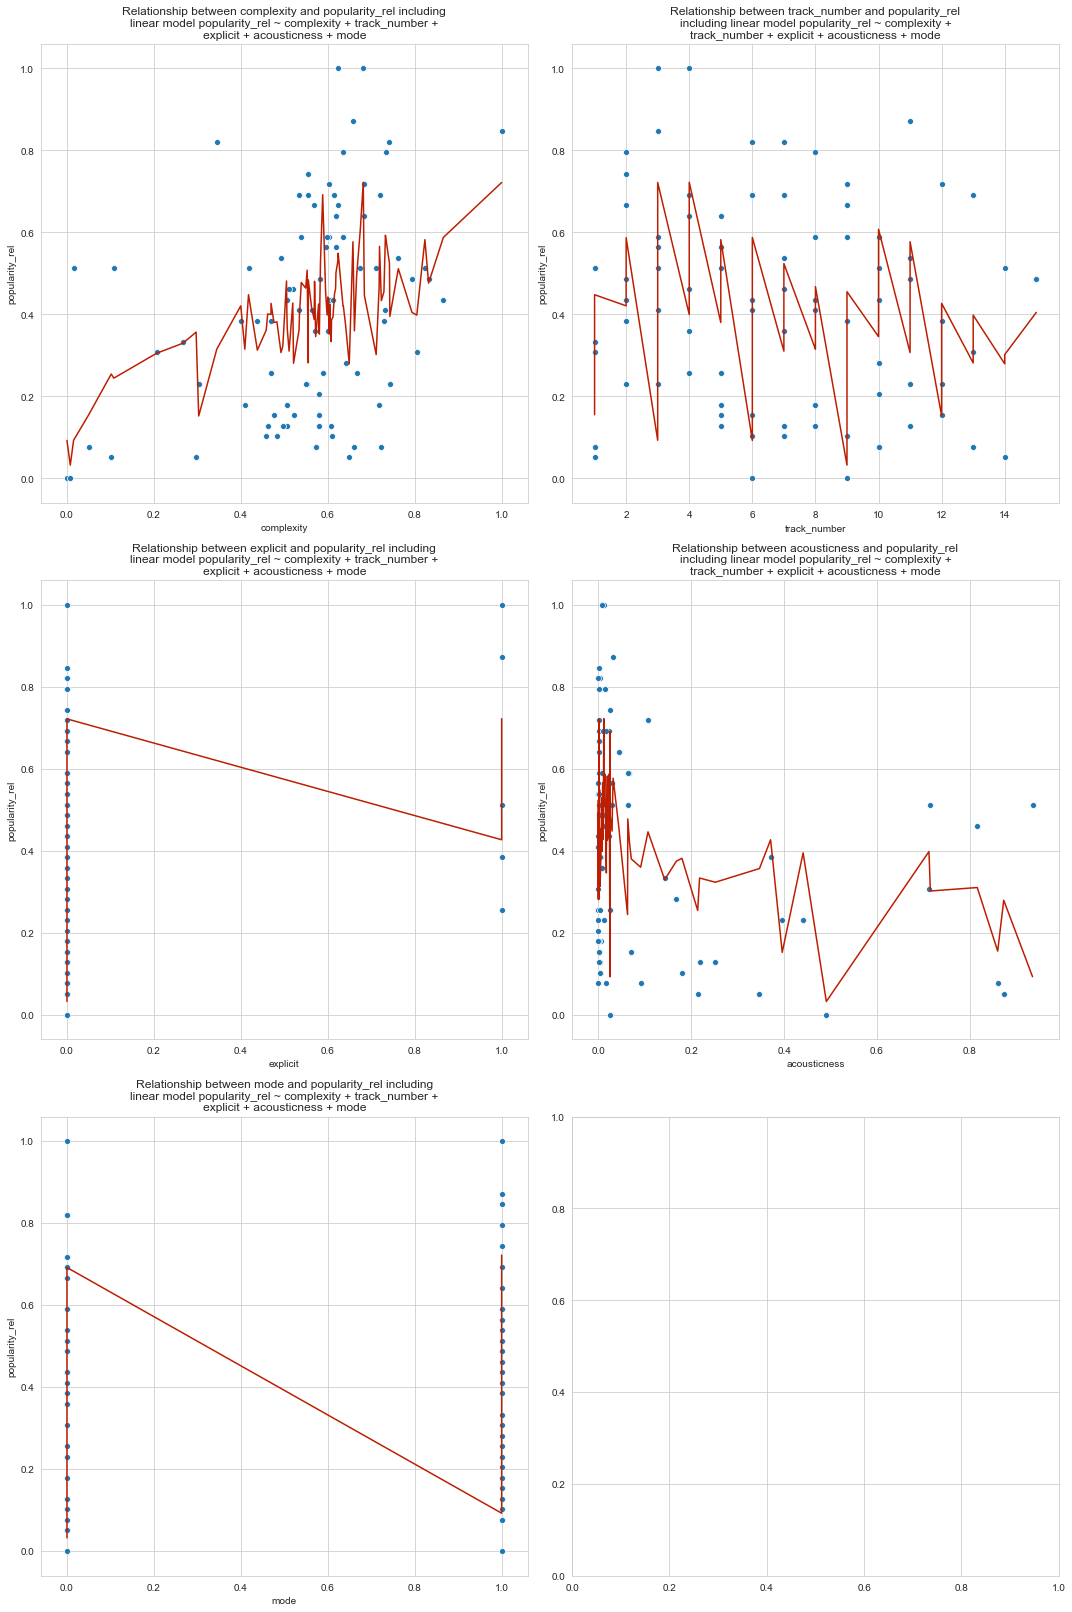

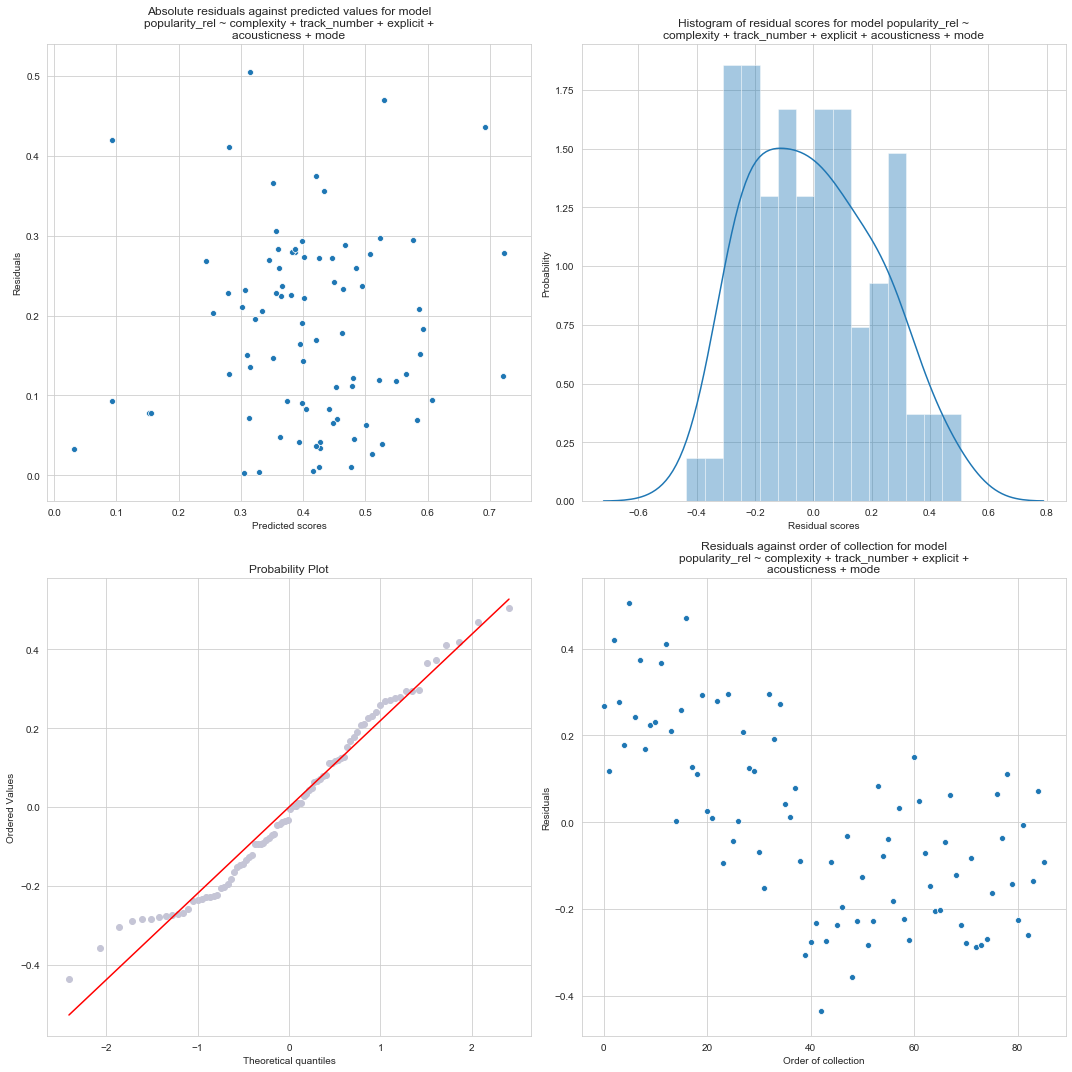

In [10]:
print_all_model_stats("popularity_rel ~ complexity + track_number + explicit + acousticness + mode", data)

### Best backward selection model using MAPE as the selection criterion

                            OLS Regression Results                            
Dep. Variable:         popularity_abs   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     1.837
Date:                Wed, 10 Jun 2020   Prob (F-statistic):             0.0495
Time:                        22:01:16   Log-Likelihood:                -304.67
No. Observations:                  86   AIC:                             639.3
Df Residuals:                      71   BIC:                             676.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         39.7284     11.501      3.

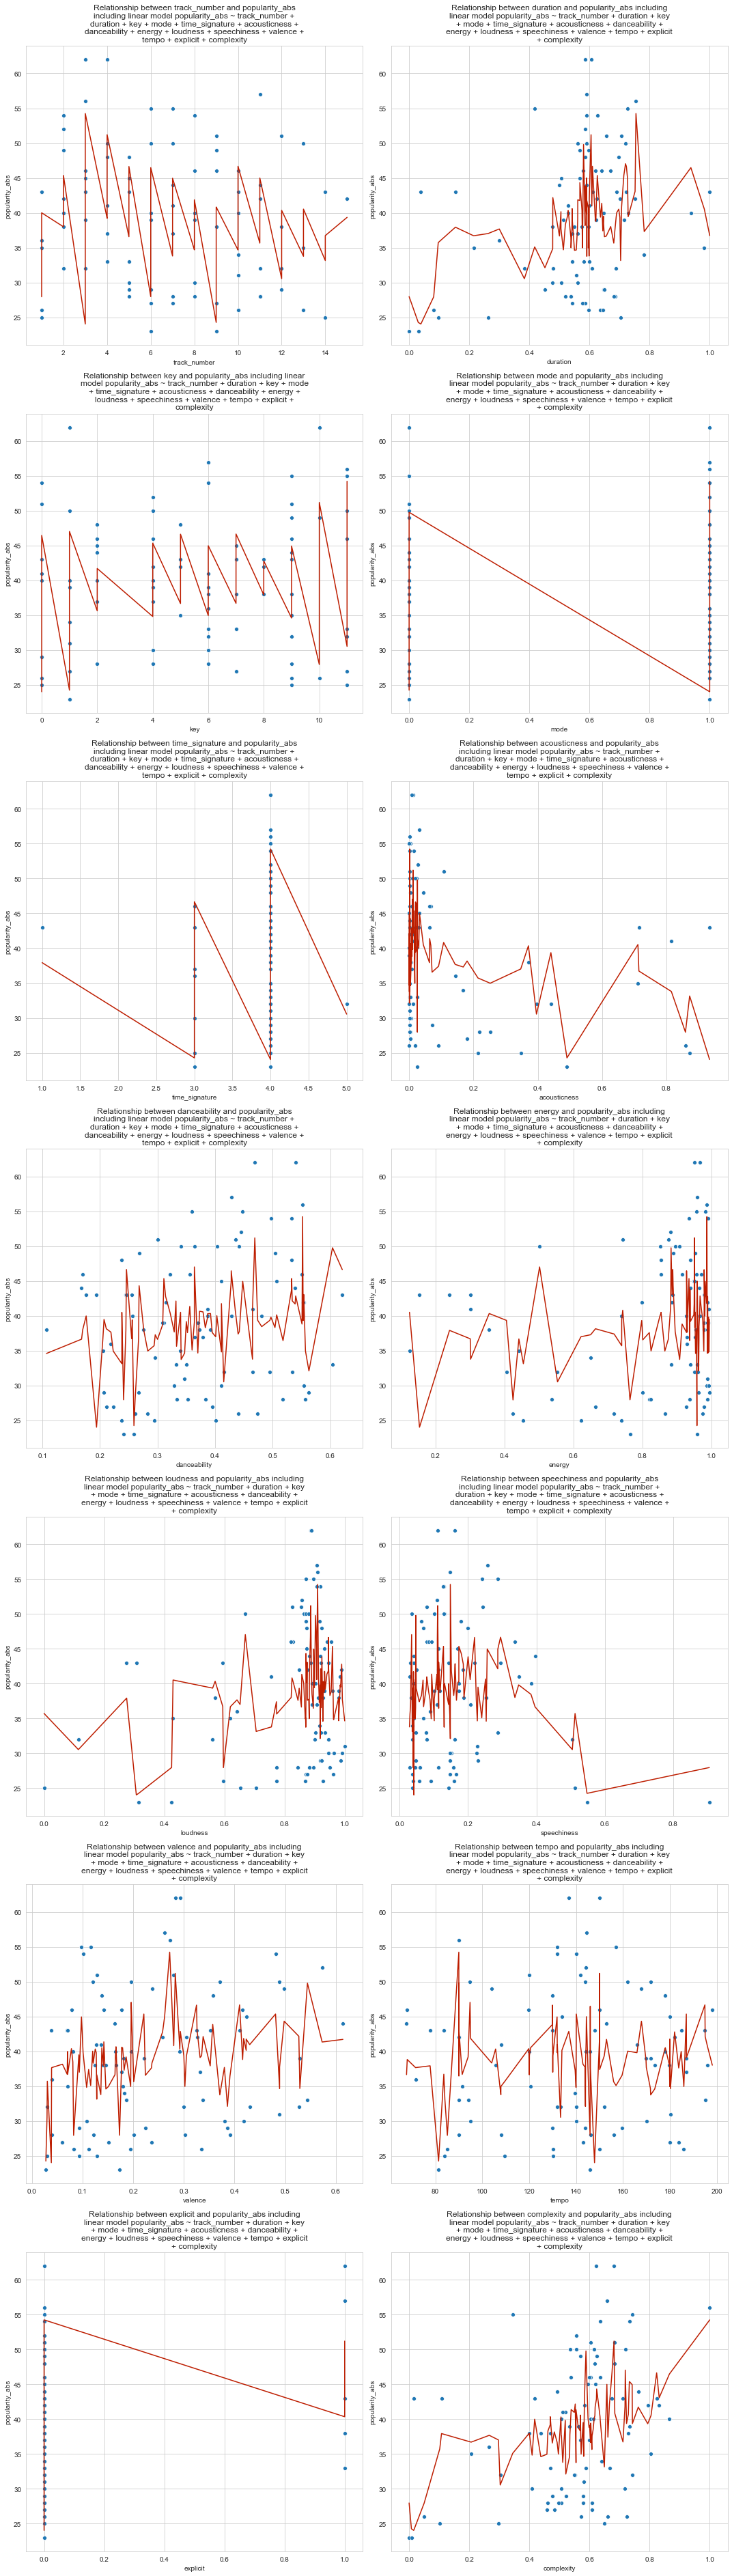

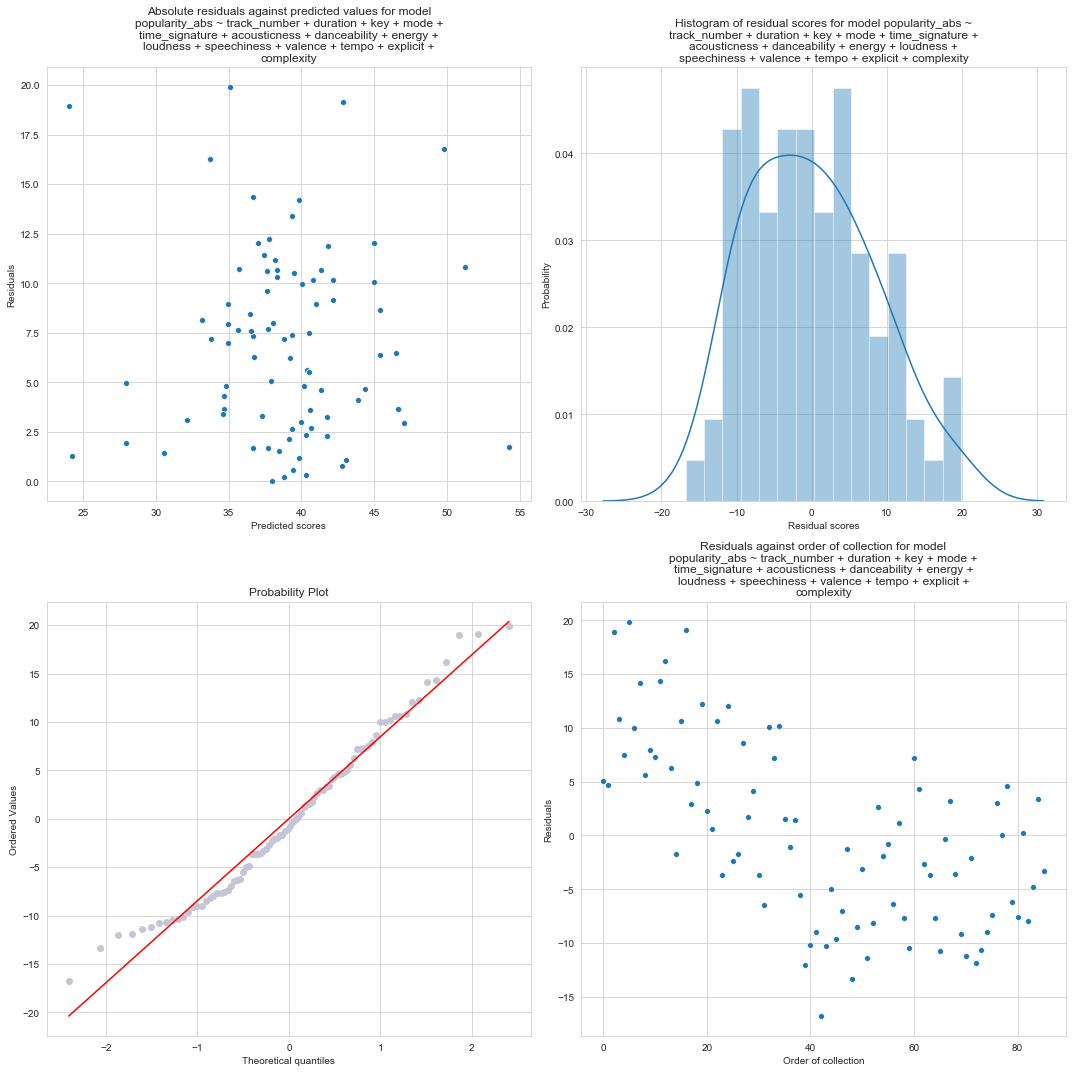

In [11]:
print_all_model_stats("popularity_abs ~ track_number + duration + key + mode + time_signature + acousticness + danceability + energy + loudness + speechiness + valence + tempo + explicit + complexity", data)

### Best backward selection model using r^2 as the selection criterion

                            OLS Regression Results                            
Dep. Variable:         popularity_abs   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     1.702
Date:                Wed, 10 Jun 2020   Prob (F-statistic):             0.0704
Time:                        22:01:22   Log-Likelihood:                -304.59
No. Observations:                  86   AIC:                             641.2
Df Residuals:                      70   BIC:                             680.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           38.1943     12.327  

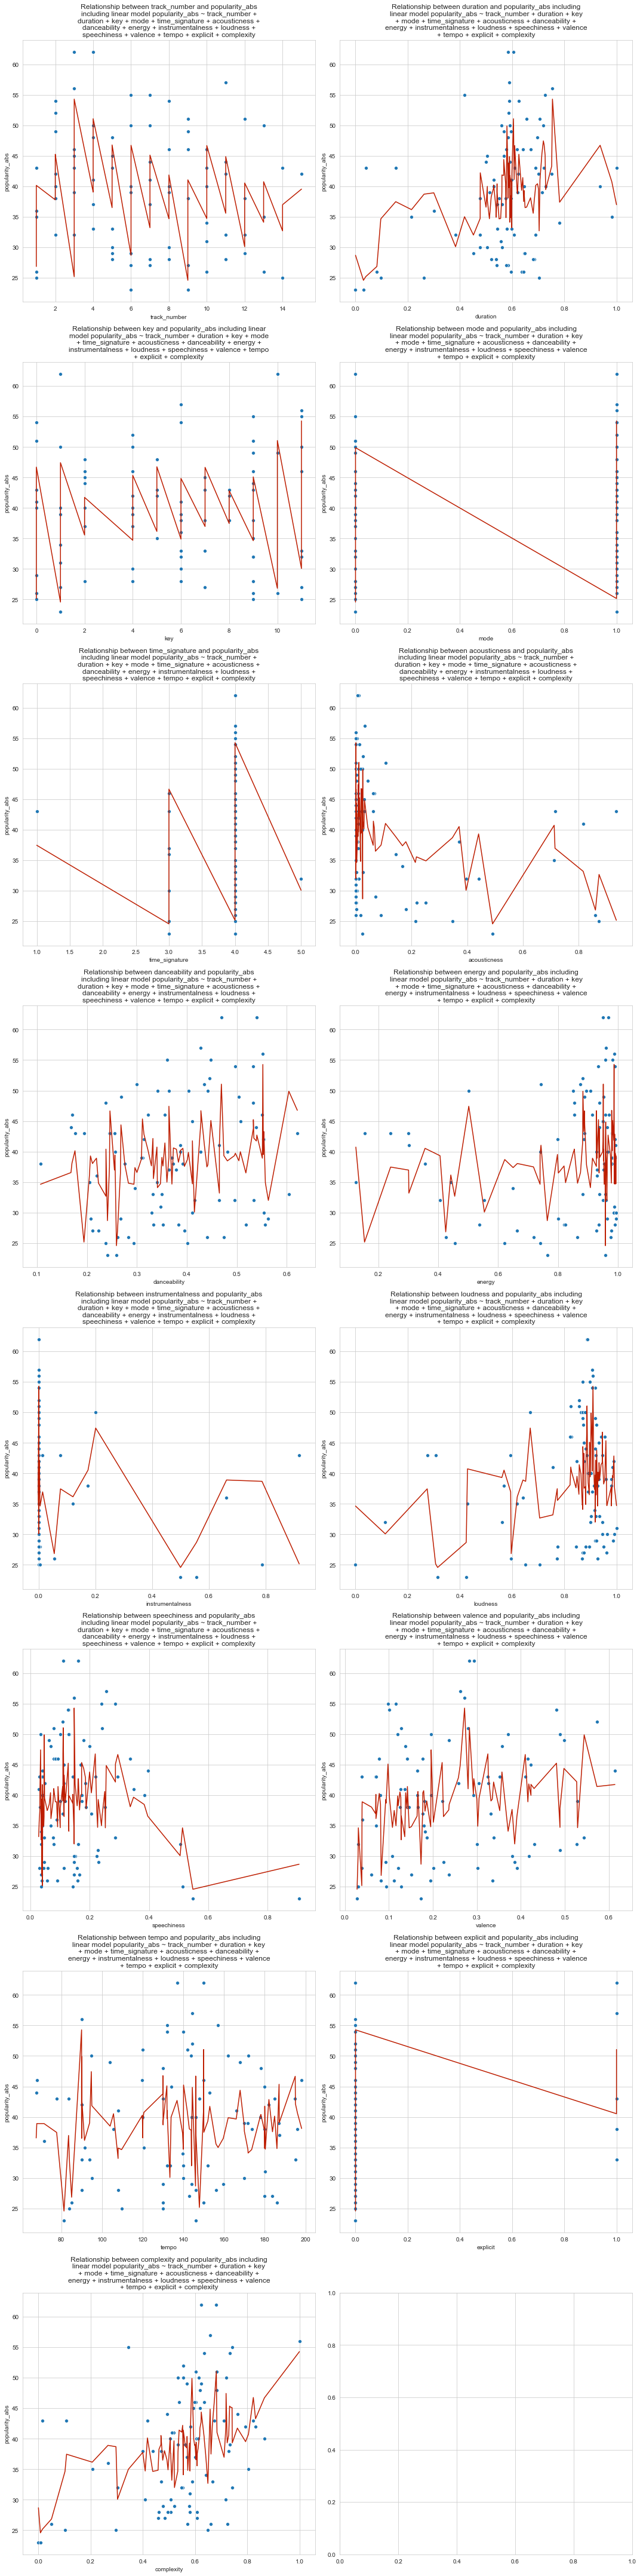

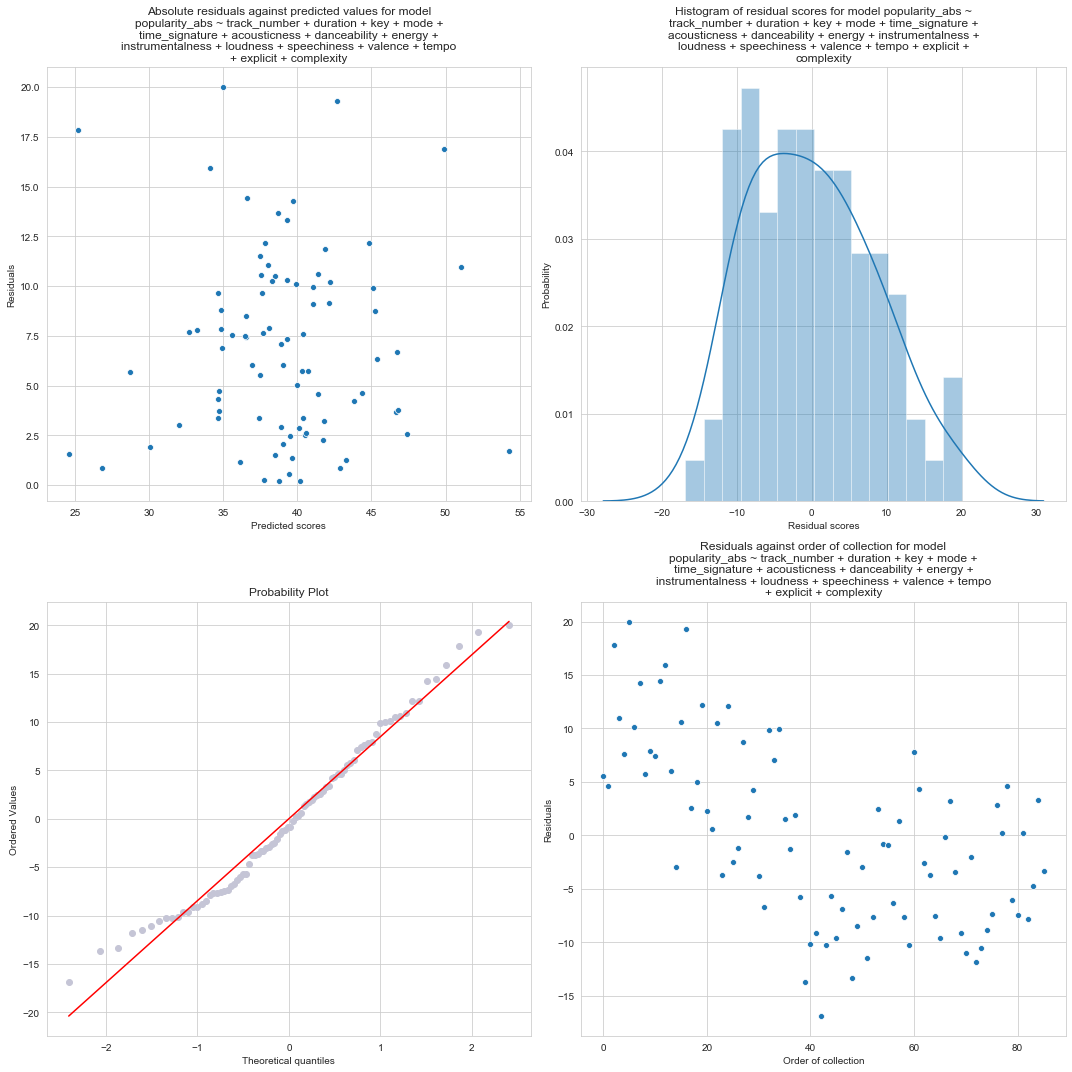

In [12]:
print_all_model_stats("popularity_abs ~ track_number + duration + key + mode + time_signature + acousticness + danceability + energy + instrumentalness + loudness + speechiness + valence + tempo + explicit + complexity", data)

### Conclusion

text